In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
warnings.filterwarnings("ignore")

from pylab import rcParams
%matplotlib inline

data = pd.read_csv(r'Telco-Customer-Churn.csv',index_col='customerID')
data.head().T

customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


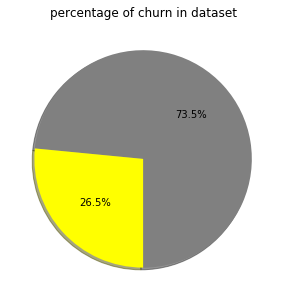

In [59]:
sizes = data['Churn'].value_counts(sort = True)
colors = ["grey","yellow"]
rcParams['figure.figsize'] = 5,5

plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 270,)
plt.title('percentage of churn in dataset')
plt.show()

In [60]:
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


DATA EXPLORATION


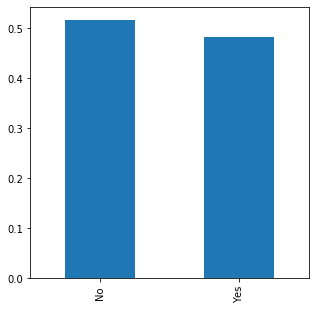

In [62]:
data.Partner.value_counts(normalize=True). plot(kind='bar');


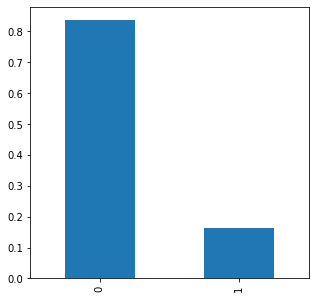

In [63]:
data.SeniorCitizen.value_counts(normalize=True).plot(kind='bar')


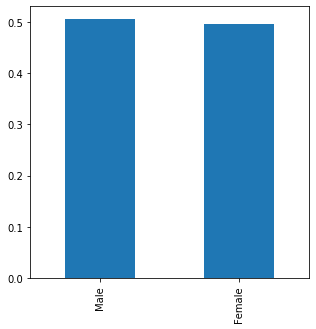

In [64]:
data.gender.value_counts(normalize=True).plot(kind='bar')

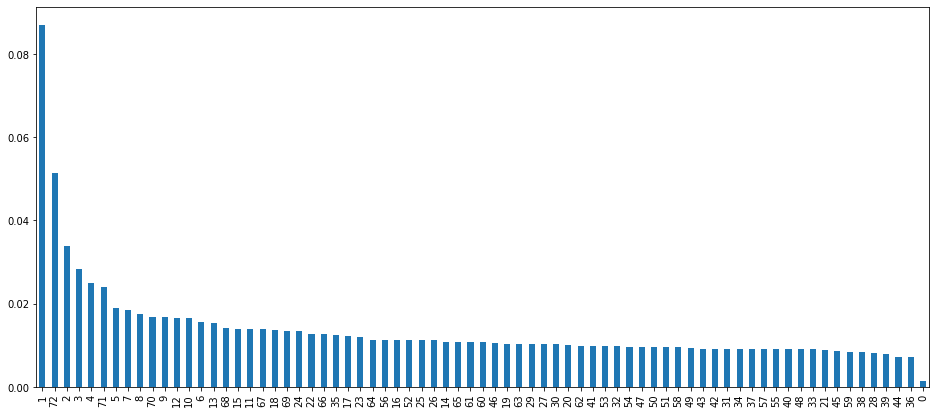

In [9]:
data.tenure.value_counts(normalize=True).plot(kind='bar', figsize=(16,7))

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


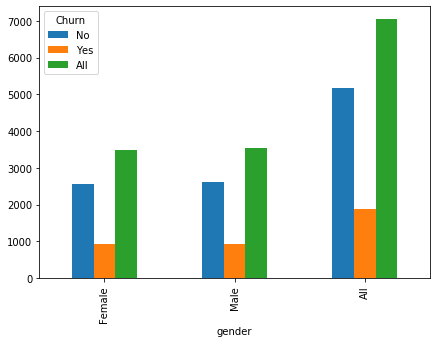

In [10]:
#COMPARING
#GENDER V/S CHURN
print(pd.crosstab(data.gender,data.Churn,margins=True))
pd.crosstab(data.gender,data.Churn,margins=True).plot(kind='bar',figsize=(7,5));

In [11]:
print('percentage of females that left the company {0}'.format((939/1869)*100))
print('percentage of males that left the company {0}'.format((930/1869)*100))

#gender doesnt play an importamnt role in the churn 


percentage of females that left the company 50.24077046548957
percentage of males that left the company 49.75922953451043


Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


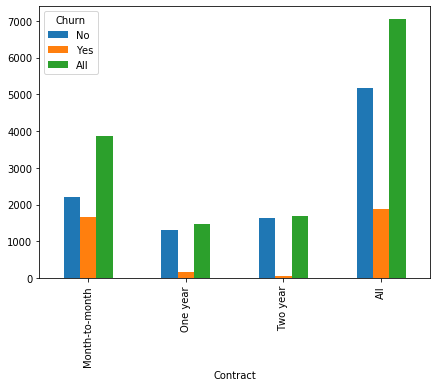

In [12]:
print (pd.crosstab(data.Contract,data.Churn,margins=True))
pd.crosstab(data.Contract,data.Churn,margins=True).plot(kind='bar',figsize=(7,5));

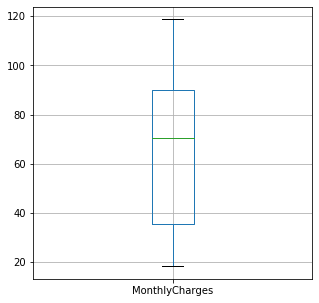

In [13]:
data.boxplot('MonthlyCharges')

In [14]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
data.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [16]:
fill = data.MonthlyCharges * data.tenure

In [17]:
data.TotalCharges.fillna(fill,inplace=True)

In [18]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
data.loc[(data.Churn == 'Yes'),'MonthlyCharges'].median()

79.65

In [20]:
data.loc[(data.Churn == 'Yes'),'TotalCharges'].median()

703.55

In [21]:
data.loc[(data.Churn == 'Yes'),'tenure'].median()

10.0

In [22]:
data.loc[(data.Churn == 'Yes'),'PaymentMethod'].value_counts(normalize=True)

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64

In [23]:
data['Is_Electronic_check'] = np.where(data['PaymentMethod'] == 'Electronic check', 1, 1) 

In [24]:
data.loc[(data.Churn == 'Yes'), 'PaperlessBilling']. value_counts(normalize = True)

Yes    0.749064
No     0.250936
Name: PaperlessBilling, dtype: float64

In [25]:
data.loc[(data.Churn == 'Yes'), 'DeviceProtection']. value_counts(normalize = True)

No                     0.64794
Yes                    0.29160
No internet service    0.06046
Name: DeviceProtection, dtype: float64

In [26]:
data.loc[(data.Churn == 'Yes'), 'OnlineBackup']. value_counts(normalize = True)

No                     0.659711
Yes                    0.279829
No internet service    0.060460
Name: OnlineBackup, dtype: float64

In [27]:
data.loc[(data.Churn == 'Yes'), 'TechSupport']. value_counts(normalize = True)

No                     0.773676
Yes                    0.165864
No internet service    0.060460
Name: TechSupport, dtype: float64

In [28]:
data.loc[(data.Churn == 'Yes'), 'OnlineSecurity']. value_counts(normalize = True)

No                     0.781701
Yes                    0.157838
No internet service    0.060460
Name: OnlineSecurity, dtype: float64

In [29]:
data = pd.get_dummies(data,columns=['Partner','Dependents','PhoneService','MultipleLines','StreamingTV','StreamingMovies','Contract','PaperlessBilling','InternetService'], drop_first=True)

In [30]:
data.drop(['StreamingMovies_No internet service','StreamingTV_No internet service'],axis=1,inplace=True)

In [31]:
data.drop('gender',axis=1,inplace=True)

In [32]:
data.drop(['tenure','MonthlyCharges'],axis=1,inplace=True)

In [34]:
data.drop(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaymentMethod'],axis=1,inplace=True)

In [36]:
data = pd.get_dummies(data,columns=['Churn'],drop_first=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 16 columns):
SeniorCitizen                     7043 non-null int64
TotalCharges                      7043 non-null float64
Is_Electronic_check               7043 non-null int64
Partner_Yes                       7043 non-null uint8
Dependents_Yes                    7043 non-null uint8
PhoneService_Yes                  7043 non-null uint8
MultipleLines_No phone service    7043 non-null uint8
MultipleLines_Yes                 7043 non-null uint8
StreamingTV_Yes                   7043 non-null uint8
StreamingMovies_Yes               7043 non-null uint8
Contract_One year                 7043 non-null uint8
Contract_Two year                 7043 non-null uint8
PaperlessBilling_Yes              7043 non-null uint8
InternetService_Fiber optic       7043 non-null uint8
InternetService_No                7043 non-null uint8
Churn_Yes                         7043 non-null uint8
dtypes: float64(1

MODELLING 

In [38]:
X = data.drop('Churn_Yes',axis=1).as_matrix().astype('float')
y = data['Churn_Yes'].ravel()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [40]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4930, 15) (4930,)
(2113, 15) (2113,)


LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression()

In [53]:
result = model.fit(X_train, y_train)

In [54]:
from sklearn import metrics 

In [55]:
prediction_test = model.predict(X_test)

In [56]:
print(metrics.accuracy_score(y_test,prediction_test)) #79% of the cases our model predicted the right outcome for 

0.7917652626597255
